<pre><strong>Three datasets are created 
 These Datasets are created after cleaning all the datasets provided 
 All_PATIENTS.csv This Dataset contains all 25 patients data from HCPA000*P.csv
 DEMOGRAPHIC.csv This dataset contains demogrpahic data provided in  "T1DM_patient_sleep_demographics_with_race.csv"
 PATINETS_WITH_DEMOGRAPHIC.csv This dataset is merge of above two datasets
 This Jupyter notebooks has cells:
     import modules
     Declare variables
     Create common function for row level Quality Check
     Create function for column level quality check of Demographic dataset
     Create a dataframe by merging all csv files having patient data
     Data Cleaning and Standardization for all patients dataframe
         Time Conversion
         Insulin Dose Cleaning
         Heart Rate
         Basal Insulin Rate
         Calories
         Glucose
     Write cleaned allpatients dataset into All_PATIENTS.csv file
     Create a dataframe using "T1DM_patient_sleep_demographics_with_race.csv" file
     Data Cleaning and Standardization for demographic dataframe
     Dataframe for demographic data by renaming all column names to lowercase with underscore
     betweeen words and created csv file
     Dataframe for merged allpatients and demographic data and created csv file</strong></pre>

In [190]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

**This section defines the file paths for the HUPA-UC Diabetes Dataset and various CSV outputs.**

In [192]:
#Variables
path = "HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
modified_demographic_path = path+"DEMOGRAPHIC.csv"
patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"
print(demographic_path)

HUPA-UC Diabetes Dataset/T1DM_patient_sleep_demographics_with_race.csv


**Common function for row level Quality Check**

In [194]:
def data_quality_report_common(df):
    print("DATA QUALITY REPORT")
    print("="*50)
    
    # Shape
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("="*50)
    
    # Missing values
    print("*"*50)
    print("\n Check for Missing Values:")
    print("*"*50)
    print("\n Number of missing column values are:\n",df.isnull().sum(), " ")
    
    # Duplicates
    print("*"*50)
    print("\n Check for Duplicate Rows:")
    print("*"*50)
    print("\n Number of duplicate rows  are :", df.duplicated().sum())
    
    # Data types
    print("*"*50)
    print("\n Check for Column Data Types:")
    print("*"*50)
    print(df.dtypes)
    
    # Unique Patient IDs
    if "patient_id" in df.columns:
        print("*"*50)
        print("\n Check for Patient IDs uniqueness and number of records:")
        print("*"*50)
        print("Number of Unique Patient IDs:", df['patient_id'].nunique())
        print("Total patient records are  :", len(df))
    
    # Numeric ranges
    print("*"*50)
    print("\n Check for Numeric Column Summary:")
    print("*"*50)
    print(df.describe().T[['min', 'max', 'mean']])
    

**Function for column level quality check of allpatients dataset**

In [196]:
#Check for impossible or outlier values fro allpatients dataset
def allpatients_data_quality_report(df):
    # Time range
    if "time" in df.columns:
        print("*"*50)
        print("\n Check for Time Range to check if time is continuous :")
        print("*"*50)
        print("Earliest time :", df['time'].min())
        print("Latest time  :", df['time'].max())
        
    
    #Check for impossible or outlier values
    print("*"*50)
    print("\n Check for Impossible or outlier values:")
    print("*"*50)
    print("Negative glucose values:", (df['glucose'] < 0).sum())
    print("Negative steps values:", (df['steps'] < 0).sum())
    print("Negative calories values:", (df['calories'] < 0).sum())
    print("Negative heart_rate values:", (df['heart_rate'] < 0).sum())
    print("Negative glucose:", (df['glucose'] < 0).sum())
    print("Unrealistic glucose > 600:", (df['glucose'] > 600).sum())
    print("Negative Insulin dose administered(bolus_volume_delivered) values:", (df['bolus_volume_delivered'] < 0).sum())
    # print('Number of invalid age value (0-100)', ((df['age']<0) | (df['age']>100)).sum())
    # print("Number of invalid Gender values not ['Male'], ['Female']", 
    #       ((df['gender']!='Male') & (df['gender']!='Female')).sum())
    # print("Number of avg sleep hours greater than 24", (df['avg_sleep_duration_hrs']>24).sum())
    # print("Number of invalid sleep quality score value(1-10)", 
    #       ((df['sleep_quality_score']<1) & (df['sleep_quality_score']>10)).sum())
    # print("Number of invalid sleep disturbances percentage >100",(df['sleep_disturbances_percentage']>100).sum())
    

    #check for range of values
    print("*"*50)
    print("\n Check for range of  values for Glucose Hear rate ,Calories ,Insulin dose administered (units) and Steps:")
    print("*"*50)
    print("Glucose range:", df['glucose'].min(), "-", df['glucose'].max())
    print("Heart rate range:", df['heart_rate'].min(), "-", df['heart_rate'].max())
    print("Calories range:", df['calories'].min(), "-", df['calories'].max())
    print("Steps range:", df['steps'].min(), "-", df['steps'].max())
    print("Insulin dose administered (units) range:", df['basal_rate'].min(), "-", df['basal_rate'].max())
    print("="*50)

    print("DATA QUALITY REPORT Completed")


**Function for column level quality check of Demographic dataset**

In [198]:
 #Check for impossible or outlier values for demographic dataset
def demographic_data_quality_report(df):
     #Check for impossible or outlier values
    print("*"*50)
    print("\n Check for Impossible or outlier values:")
    print("*"*50)
    print('Number of invalid age value (0-100)', ((demographic_df['age']<0) | (demographic_df['age']>100)).sum())
    print("Number of invalid Gender values not ['Male'], ['Female']", 
          ((demographic_df['gender']!='Male') & (demographic_df['gender']!='Female')).sum())
    print("Number of avg sleep hours greater than 24", (demographic_df['avg_sleep_duration_hrs']>24).sum())
    print("Number of invalid sleep quality score value(1-10)", 
          ((demographic_df['sleep_quality_score']<1) & (demographic_df['sleep_quality_score']>10)).sum())
    print("Number of invalid sleep disturbances percentage >100",(demographic_df['sleep_disturbances_percentage']>100).sum())
    print("="*50)


**This code reads all CSV files containing patient data, adds a patient_id column based on the filename, concatenates them into a single DataFrame, and saves it as a new CSV file.**

**Key Steps:**

- **List CSV Files:** Use `glob` to get all patient CSV files starting with "H".
- **Read & Annotate:** Read each CSV and add a `patient_id` column extracted from the filename.
- **Concatenate DataFrames:** Merge all individual DataFrames into one using `pd.concat()`.
- **Save CSV:** Export the combined DataFrame to a CSV file without the index column.


In [200]:
#Creating a dataframe by merging all csv files having patient data
csv_files = glob.glob(os.path.join(path,"H*.csv"))
df_list =[]
for file in csv_files:
    patientId = os.path.basename(file).split(".")[0]
    df = pd.read_csv(file,sep=";")
    df["patient_id"] = patientId
    df_list.append(df)
patients_df = pd.concat(df_list, ignore_index = True)
patients_df.columns
patients_df.to_csv(all_patients_path,index=False)

**Data Cleaning and Standardization**

**2. Time Conversion**

**Key Steps:**


- **a. The time column is converted from text (object) to proper datetime format using pd.to_datetime() so as to sort, filter, or calculate with it meaningfully.If time stays as a string (object), Python just sees it as plain text**

  
- **b. Any invalid or unrecognized time values are set to NaT (Not a Time) using errors='coerce'. c. A new column Patient_ID is added to uniquely identify each participant, derived from the filename.**

In [202]:

patients_df['time'] = pd.to_datetime(patients_df['time'], errors='coerce')



**Data Cleaning and Standardization**

**3. Insulin Dose Cleaning**

**Key Steps:**

- **a.**The column `bolus_volume_delivered` (insulin dose administered) is checked for invalid negative values.**
  
- **b.**Since negative doses are not meaningful, all negative values are replaced with 0.**


In [204]:
patients_df.loc[patients_df['bolus_volume_delivered'] < 0, 'bolus_volume_delivered'] = 0

**Data Cleaning and Standardization**

**4. Heart Rate**

**Key Steps:**

- **a. Rounded heart_rate values to the nearest integer.**
  
- **b. This ensures values are clinically interpretable, since heart rate is typically measured in whole beats per minute (BPM).**

In [206]:
## Round heart_rate to nearest integer for Clinical/medical analysis 
patients_df['heart_rate'] = patients_df['heart_rate'].round(0).astype(int)

**Data Cleaning and Standardization**

**5. Basal Insulin Rate**

**Key Steps:**

- **a. Created a new column basal_rate_cleaned by adjusting basal_rate to realistic increments of 0.025 units/hour (a common resolution in insulin pumps).**
  
- **b.Very small noise values (< 0.025) were clipped to 0 to avoid meaningless fluctuations.**

In [208]:
# changing to  realistic basal_rate for modeling/analysis.
patients_df['basal_rate_cleaned'] = ((patients_df['basal_rate'] / 0.025).round() * 0.025).round(3)
# clip tiny noise values
patients_df.loc[patients_df['basal_rate_cleaned'] < 0.025, 'basal_rate_cleaned'] = 0

**Data Cleaning and Standardization**

**6. Calories**

**Key Steps:**

- **a. Rounded calories to 1 decimal place for readability and consistent reporting.**

In [210]:
#Round calories to 1 decimal place
patients_df['calories'] = patients_df['calories'].round(1)

**Data Cleaning and Standardization**

**7. Glucose**

**Key Steps:**

- **a. Rounded glucose to 1 decimal place for easier comparison and clinical interpretation.**

In [212]:
#Round glucose to 1 decimal place
patients_df['glucose'] = patients_df['glucose'].round(1)

<pre><strong>Created csv file "ALL_PATIENTS.csv" file 
after Data Cleaning and Standardization of all_Patients dataframe</strong></pre>  


In [214]:
#Write cleaned allpatients dataset into csv file
patients_df.to_csv(all_patients_path,index=False)
cleaned_all_patient_df = pd.DataFrame(patients_df)
cleaned_all_patient_df.to_csv("cleaned_all_patient_df_output.csv")

**Data Cleaning and Standardization for demographic dataset**  
**csv file:'T1DM_patient_sleep_demographics_with_race.csv'**  
**Rename columns according to HUPA standard naming conventions, and save the modified DataFrame to a new CSV file.**


**Key Steps:**


- **Read CSV:** Load the demographic dataset into a Pandas DataFrame.
- **Rename Columns:** Align column names with HUPA naming standards for consistency.
- **Save CSV:** Export the modified DataFrame to a new CSV without the index column.


In [216]:
# Created dataframe fro demographic csv file and 
# Renamed Column names as per the HUPA standred naming conventions and created new csv file
demographic_df = pd.read_csv(demographic_path)
demographic_df.rename(columns={"Patient_ID":"patient_id","Age":"age","Gender":"gender","Race":"race","Average Sleep Duration (hrs)":"avg_sleep_duration_hrs","Sleep Quality (1-10)":"sleep_quality_score","% with Sleep Disturbances":"sleep_disturbances_percentage"},inplace = True)
demographic_df.columns
demographic_df.to_csv(modified_demographic_path, index=False)

**Data Cleaning and Standardization of demographic dataset**

**1. Patient Id Cleaning**

**Key Steps:**

- **a.**The column `patient_id` is checked for duplicate values.**
  

In [218]:
demographic_df['patient_id'].duplicated().sum()

0

**Data Cleaning and Standardization**

**1. Patient Age Cleaning**

**Key Steps:**

- **a.**The column `age` is checked for negative values.**
- **b.**Since negative age is not meaningful, all negative values are replaced with 0.**

  

In [220]:
demographic_df.loc[demographic_df['age']<0,'age']=0

**Data Cleaning and Standardization**

**2. Patient gender Check**

**Key Steps:**

- **a.**The column `gender` is checked for empty values.**
- **b.**First assign (Null values) NaN to empty column values
        and then Replace all empty values to NaN and the replace with 'Prefer not to say'.**

  

In [222]:
demographic_df['gender'] = demographic_df['gender'].replace("",np.nan).fillna("Prefer not to say")

**Data Cleaning and Standardization**

**3. Patient race Check**

**Key Steps:**

- **a.**The column `race` is checked for null values.**
- **b.**All null values replaces with "Other'.**

  

In [224]:
demographic_df['race'] = demographic_df['race'].replace("",np.nan).fillna("Other")


**Data Cleaning and Standardization**

**4. Patient avg_sleep_duration_hrs Check**

**Key Steps:**  
**replace("",0) replaces empty values to zero**  
**mask(lambda x: x<0,0): replaces negative values to zero**
- **a.**The column `avg_sleep_duartion_hrs` is checked for null values.**
- **b.**All null and negative values replaced with  0'. 0 is not sleeping**
- **c.**All values greater than 24 replaced with  24'. 24 is maximum sleeping**

  

In [226]:
demographic_df['avg_sleep_duration_hrs'] = demographic_df['avg_sleep_duration_hrs'].replace("",0).mask(lambda x: x < 0,0)
demographic_df['avg_sleep_duration_hrs'] = demographic_df['avg_sleep_duration_hrs'].mask(lambda x: x >24 ,24)

**Data Cleaning and Standardization**

**5. Patient sleep_quality_score Check**
**Considered value range: 1-10**  
**Key Steps:**  
**replace("",1) replaces empty values to one**  
**mask(lambda x: x<1,1): replaces negative values to one**
- **a.**The column `sleep_quality_score` is checked for null values.**
- **b.**All null and less than one values replaced with  1'. 1 is worst score**
- **c.**All values greater than 10 replaced with  10'. 10 is good score**

  

In [228]:
demographic_df['sleep_quality_score'] = demographic_df['sleep_quality_score'].replace("",1).mask(lambda x: x < 1,1)
demographic_df['sleep_quality_score'] = demographic_df['sleep_quality_score'].mask(lambda x: x >10 ,10)

**Data Cleaning and Standardization**

**6. Patient sleep_disturbances_percentage Check**
**Considered value range: 0-100**  
**Key Steps:**  
**replace("",0) replaces empty values to zero**  
**mask(lambda x: x<0,0): replaces negative values to one**
- **a.**The column `sleep_disturbances_percentage` is checked for null values.**
- **b.**All null and less than one values replaced with  0'. 0 is lower quality**
- **c.**All values greater than 100 replaced with  100'. 100 is higher quality**

  

In [230]:
demographic_df['sleep_disturbances_percentage'] = demographic_df['sleep_disturbances_percentage'].replace("",0).mask(lambda x: x < 0,0)
demographic_df['sleep_disturbances_percentage'] = demographic_df['sleep_disturbances_percentage'].mask(lambda x: x >100 ,100)

**This code merges the combined patient dataset with the demographic dataset on patient_id and saves the resulting DataFrame as a new CSV file.**


**Key Steps:**


- **Merge DataFrames:** Use pd.merge() with how="inner" to combine patient and demographic datasets based on patient_id.
- **Save CSV:** Export the merged DataFrame to a CSV file without including the index column.
- **Verify Columns:** Check the resulting columns to ensure all patient and demographic data are included.

In [232]:
#Dataframe for merged allpatients and demographic data and created csv file
patients_demographic_df = pd.merge(patients_df,demographic_df, on ="patient_id", how="inner")
patients_demographic_df.to_csv(patients_demographic_path, index=False)
patients_demographic_df.columns

Index(['time', 'glucose', 'calories', 'heart_rate', 'steps', 'basal_rate',
       'bolus_volume_delivered', 'carb_input', 'patient_id',
       'basal_rate_cleaned', 'age', 'gender', 'race', 'avg_sleep_duration_hrs',
       'sleep_quality_score', 'sleep_disturbances_percentage'],
      dtype='object')

In [233]:
patients_demographic_df.shape
print(patients_demographic_df.columns)
missingvalues_percentage = patients_demographic_df.isnull().mean() * 100

Index(['time', 'glucose', 'calories', 'heart_rate', 'steps', 'basal_rate',
       'bolus_volume_delivered', 'carb_input', 'patient_id',
       'basal_rate_cleaned', 'age', 'gender', 'race', 'avg_sleep_duration_hrs',
       'sleep_quality_score', 'sleep_disturbances_percentage'],
      dtype='object')


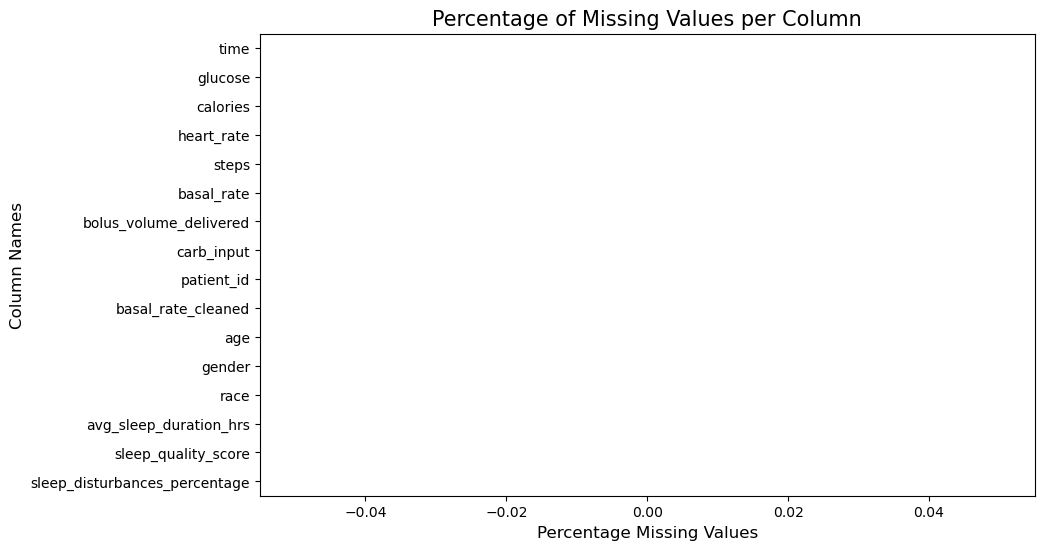

In [234]:
# Convert Series → DataFrame
missing_df = missingvalues_percentage.reset_index()
missing_df.columns = ["column", "missing_pct"]

plt.figure(figsize=(10,6))
sns.barplot(data=missing_df, x="missing_pct", y="column", color="skyblue")
plt.title("Percentage of Missing Values per Column", fontsize=15)
plt.xlabel("Percentage Missing Values", fontsize=12)
plt.ylabel("Column Names", fontsize=12)
plt.show()


<pre><strong>Data Quality Report

This Python function generates a comprehensive data quality report for a given DataFrame. It checks for missing values, duplicates, data types, numeric ranges, and impossible or outlier values.

Key Checks Performed:

Dataset shape – rows and columns.

Missing values – column-wise count.

Duplicate rows – total duplicates in the dataset.

Data types – helps ensure correct types for analysis.

Patient ID uniqueness – checks for repeated patients.

Numeric summary – min, max, mean values of numeric columns.

Time range – earliest and latest timestamps.

Impossible/outlier values – negative values or unrealistic glucose readings.

Value ranges – ensures columns like glucose, steps, heart rate, and calories fall in reasonable ranges</strong></pre>

**Data Quality Report for all Patients dataFrame**

In [237]:
#Data Quality Report for all Patients dataFrame
data_quality_report_common(patients_df)
allpatients_data_quality_report(patients_df)
print("DATA QUALITY REPORT Completed")


DATA QUALITY REPORT
Rows: 309392, Columns: 10
**************************************************

 Check for Missing Values:
**************************************************

 Number of missing column values are:
 time                      0
glucose                   0
calories                  0
heart_rate                0
steps                     0
basal_rate                0
bolus_volume_delivered    0
carb_input                0
patient_id                0
basal_rate_cleaned        0
dtype: int64  
**************************************************

 Check for Duplicate Rows:
**************************************************

 Number of duplicate rows  are : 0
**************************************************

 Check for Column Data Types:
**************************************************
time                      datetime64[ns]
glucose                          float64
calories                         float64
heart_rate                         int64
steps                     

**Qaultiy report for demographic dataframe**

In [239]:
#Data Quality Report for demographic data
data_quality_report_common(demographic_df)
demographic_data_quality_report(demographic_df)
print("DATA QUALITY REPORT Completed")


DATA QUALITY REPORT
Rows: 25, Columns: 7
**************************************************

 Check for Missing Values:
**************************************************

 Number of missing column values are:
 patient_id                       0
age                              0
gender                           0
race                             0
avg_sleep_duration_hrs           0
sleep_quality_score              0
sleep_disturbances_percentage    0
dtype: int64  
**************************************************

 Check for Duplicate Rows:
**************************************************

 Number of duplicate rows  are : 0
**************************************************

 Check for Column Data Types:
**************************************************
patient_id                        object
age                                int64
gender                            object
race                              object
avg_sleep_duration_hrs           float64
sleep_quality_score      

In [240]:
#Data Quality Report for merged all patients and demographic data
data_quality_report_common(patients_demographic_df)
allpatients_data_quality_report(patients_demographic_df)
demographic_data_quality_report(patients_demographic_df)
print("DATA QUALITY REPORT Completed")


DATA QUALITY REPORT
Rows: 309392, Columns: 16
**************************************************

 Check for Missing Values:
**************************************************

 Number of missing column values are:
 time                             0
glucose                          0
calories                         0
heart_rate                       0
steps                            0
basal_rate                       0
bolus_volume_delivered           0
carb_input                       0
patient_id                       0
basal_rate_cleaned               0
age                              0
gender                           0
race                             0
avg_sleep_duration_hrs           0
sleep_quality_score              0
sleep_disturbances_percentage    0
dtype: int64  
**************************************************

 Check for Duplicate Rows:
**************************************************

 Number of duplicate rows  are : 0
*******************************************